# UTSA CS 3793/5233: Assignment-1

**Mendez - Ramiro - (eyi617)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


# install necessary packages for imports!pip insall networks
!pip install geopandas
!pip install haversine

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Add only your imports here
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import plotly.express as px
import geopandas as gpd
import geopy.distance
import heapq
from haversine import haversine, Unit

In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

In [ ]:
# Load the graph data from the files
cities_path= (basePath + "cities.csv")
distances_path = (basePath + "distances.csv")

state_map = gpd.read_file(basePath + "usa-states-census-2014.shp")

cities_colnames = ['city', 'latitude', 'longitude']
distances_colnames = ['city_a', 'city_b', 'distance']

cities = pd.read_csv(cities_path , names = cities_colnames, index_col = 'city')
distances = pd.read_csv(distances_path, names = distances_colnames)

In [ ]:
# adjacency matrix

#initializes the 29x29 adjacency matrix and values to -1
adj_matrix = pd.DataFrame()
adj_matrix.__init__(data = -1, index = cities.index, columns = cities.index, dtype=float)

# fills in the adjacency matrix on each series and adds the city names for both axis and replaces -1 with correct distances
for route in distances.iterrows():
  city_a = route[1]['city_a']
  city_b = route[1]['city_b']
  distance = route[1]['distance']

  adj_matrix[city_a][city_b] = distance
  adj_matrix[city_b][city_a] = distance

# initializes the Texas shape file and adds the coordinate system
state_map = state_map.to_crs("EPSG:4326")
texas = state_map[state_map['NAME'] == 'Texas']

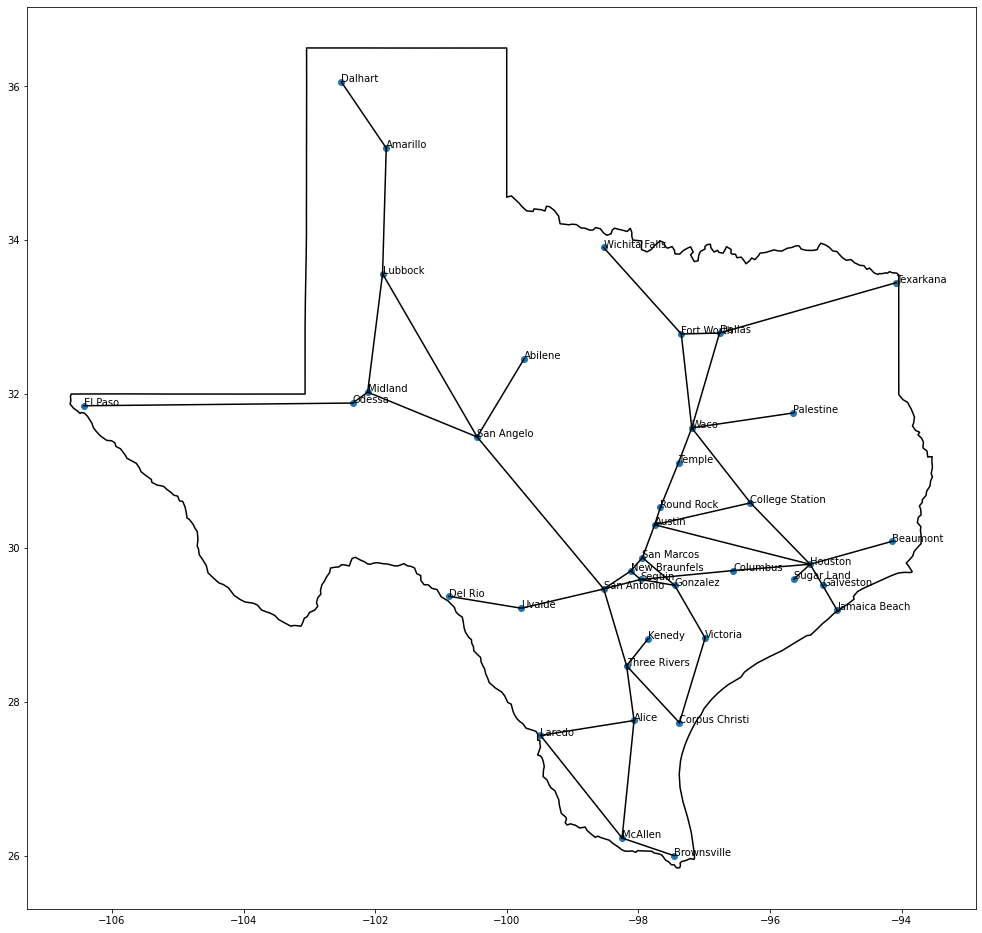

In [ ]:
# # Display a 2D graph of the given data.

fig,ax = plt.subplots(figsize = (17,17)) # creates a 12x12 figure for the graph 
plt.scatter(cities['longitude'], cities['latitude']) # plots the cities using the coordinates from the cities panda
texas.boundary.plot(ax=ax, color='black') # adds in the shapefile to lay over the figure

# adds in the labels for each plot point
for index, row in cities.iterrows():
  plt.annotate(index, (row[1], row[0]))

# adds in the adges between cities using the distances panda
for index, row in distances.iterrows():
  start_city = cities.loc[row[0]]
  end_city = cities.loc[row[1]]
  y = [float(start_city['latitude']), float(end_city['latitude'])]  
  x = [float(start_city['longitude']), float(end_city['longitude'])] 
  plt.plot(x, y, color='black')

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
explored= [] # List to keep track of visited nodes.
frontier = ['Three Rivers']     #Initialize a queue
distance_traveled = 0 # total distance the virus traveled

# loop until frontier is empty and all cities have been explored
while frontier:
  current = frontier.pop(0) # pop the first item in frontier list
  explored.append(current) # append and add the current city into explored
  current_series = adj_matrix[current].sort_values() # pull the series from the adj_matrix using the current node
  
  # loop through each item in series and store the city names and the distances if theres a connection
  for city, step_cost in current_series.iteritems():
    if step_cost != -1 and city not in frontier and city not in explored:
        frontier.append(city)
        distance_traveled = distance_traveled + step_cost

# prints the distance traveled and the path in order
print(f'Total Distance Traveled: {distance_traveled}\n')
for i in range (len(explored)):
  print(explored[i])

Total Distance Traveled: 3354.3199229800002

Three Rivers
Kenedy
Alice
San Antonio
Corpus Christi
Laredo
McAllen
New Braunfels
Seguin
Uvalde
San Angelo
Victoria
Brownsville
San Marcos
Gonzalez
Columbus
Del Rio
Abilene
Midland
Lubbock
Austin
Houston
Odessa
Amarillo
Round Rock
College Station
Sugar Land
Galveston
Beaumont
El Paso
Dalhart
Temple
Waco
Jamaica Beach
Dallas
Fort Worth
Palestine
Texarkana
Wichita Falls


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
def findStr(tuples_list, string):
  found = False
  for item1, item2 in tuples_list:
    if item2 == string:
      found = True
  return found

def not_found_in_string(tuples_list, string):
  if findStr(tuples_list, string):
    return False
  else:
    return True

# creates a heuristic table using straight line distances between cities
def heuristic_table(cities, goalCity):
  heuristic_t = pd.DataFrame()
  heuristic_t.__init__(data=-1, index=cities.index, columns=['hn'], dtype=float)
  goal_coord = (cities.loc[goalCity]['latitude'], cities.loc[goalCity]['longitude'])
  
  for city in heuristic_t.index:
    city_coord = (cities.loc[goalCity]['latitude'], cities.loc[goalCity]['longitude'])
    hn = haversine(city_coord, goal_coord, Unit.MILES)
    heuristic_t.loc[city]['hn'] = hn  
  return heuristic_t  

def update_vaccine_travel(vaccine_travel, city, parent, gn, cost, heuristic_t):
  vaccine_travel.loc[city, 'parent'] = parent
  vaccine_travel.loc[city, 'gn'] = gn
  vaccine_travel.loc[city, 'step cost'] = cost
  vaccine_travel.loc[city, 'fn'] = heuristic_t.loc[city, 'hn']
  return vaccine_travel


def a_star(graph, cities, startCity, goalCity):
  frontier = []
  explored = []
  unexplored = list(cities.index)
  heuristic_t = heuristic_table(cities, goalCity)
  numCities = len(unexplored)

  parent = ["null"] * numCities
  gn = [-1] * numCities
  stepCost = [-1] * numCities
  fn = [-1] * numCities

  vaccineTravel = pd.DataFrame(list(zip(parent, gn, stepCost, fn)), columns=['parent', 'gn', 'step cost', 'fn'])
  vaccineTravel = update_vaccine_travel(vaccineTravel, startCity, 'start', 0, 0, heuristic_t)
  unexplored.remove(startCity)
  heapq.heappush(frontier, (vaccineTravel.loc[startCity, 'fn'], startCity))

  while unexplored or frontier:
    if not frontier:
      return "Path Was Not Found"
    
    (current_fn, currentCity ) = heapq.heappop(frontier)

    explored.append(currentCity)

    if currentCity == goalCity:
      print(f"Distance : {vaccineTravel.loc[goalCity, 'gn']} mi")
      path = []
      path.append(goalCity)
      while True:
        if goalCity == startCity:
          break
        goalCity = vaccineTravel.loc[goalCity, 'parent']
        path.append(goalCity)
      path.reverse()

      print(f"Path: {', '.join(path)}")

    step_cost_mat = adj_matrix[:][currentCity]
    step_cost_mat = step_cost_mat[(step_cost_mat > -1)].sort_values()

    for city, stepCost in step_cost_mat.items():
      if stepCost != -1:
        
        gn = vaccineTravel.loc[currentCity, 'gn'] + stepCost
        hn = heuristic_t.loc[city, 'hn']
        fn = gn + hn

        if (not_found_in_string(frontier, city)) and (city not in explored):
          heapq.heappush(frontier, (fn, city))
          unexplored.remove(city)
          vaccineTravel.loc[city, 'gn'] = gn 
          vaccineTravel.loc[city, 'fn'] = fn
          vaccineTravel.loc[city, 'parent'] = currentCity

        elif findStr(frontier, city):
          resultIndex = next((i for i, item in enumerate(frontier) if item[1] == city), None)
          (old_fn, oldCity) = frontier[resultIndex]

          if old_fn > fn:
            frontier[resultIndex] = frontier[-1]
            frontier.pop()
            heapq.heapify(frontier)
            heapq.heappush(frontier, (fn, city))

            vaccineTravel.loc[city, 'gn'] = gn 
            vaccineTravel.loc[city, 'fn'] = fn
            vaccineTravel.loc[city, 'parent'] = currentCity
            vaccineTravel.loc[city, 'step cost'] = stepCost

        elif city in explored:
          old_fn = vaccineTravel.loc[city, 'fn']

          if old_fn > fn:
            explored.remove(city)
            heapq.heappush(frontier, (fn, city))
            vaccineTravel.loc[city, 'gn'] = gn 
            vaccineTravel.loc[city, 'fn'] = fn
            vaccineTravel.loc[city, 'parent'] = currentCity
            vaccineTravel.loc[city, 'step cost'] = stepCost

a_star(adj_matrix, cities, 'San Antonio', 'College Station')

Distance : 186.77450141 mi
Path: San Antonio, New Braunfels, San Marcos, Austin, College Station


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



